In [ ]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
print(digits.DESCR)

Scikit-learn’s machine-learning algorithms require samples to be stored in a two-dimen- sional array of floating-point values (or two-dimensional array-like collection, such as a list of lists):

• Each row represents one sample.

• Each column in a given row represents one feature for that sample.

In [ ]:
print('RAW image data')
print(digits.images[8])
print('Image labled')
print(digits.target[8])
plt.imshow(digits.images[8], cmap=plt.cm.gray_r)

You should always familiarize yourself with your data. This process is called data exploration. For the digit images, you can get a sense of what they look like by displaying them with the Matplotlib implot function. The following image shows the dataset’s first 24 images. To see how difficult a problem handwritten digit recognition is, consider the vari- ations among the images of the 3s in the first, third and fourth rows, and look at the images of the 2s in the first, third and fourth rows.

In [ ]:
figure, axes = plt.subplots(nrows = 4, ncols = 6, figsize=(10, 5))

for item  in zip(axes.ravel(), digits.images, digits.target): 
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r) 
  axes.set_xticks([]) # remove x-axis tick marks 
  axes.set_yticks([]) # remove y-axis tick marks axes.set_title(target)
  axes.set_title('Training: %i' % target)
plt.tight_layout()

plt.plot()

# Splitting the Data for Training and Testing

To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,). Subsequently, the entire dataset will be of shape (n_samples, n_features), where n_samples is the number of images and n_features is the total number of pixels in each image.
We can then split the data into train and test subsets and fit a support vector classifier on the train samples. The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset.

To specify different splits, you can set the sizes of the testing and training sets with the train_test_split function’s keyword arguments test_size and train_size. Use float- ing-point values from 0.0 through 1.0 to specify the percentages of the data to use for each. You can use integer values to set the precise numbers of samples. If you specify one of these keyword arguments, the other is inferred.

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)

# Creating and Training the Model

In [ ]:
# Create a classifier: a support vector classifier
clf = svm.SVC()

# Learn the digits on the train subset
clf.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Predict the Classes

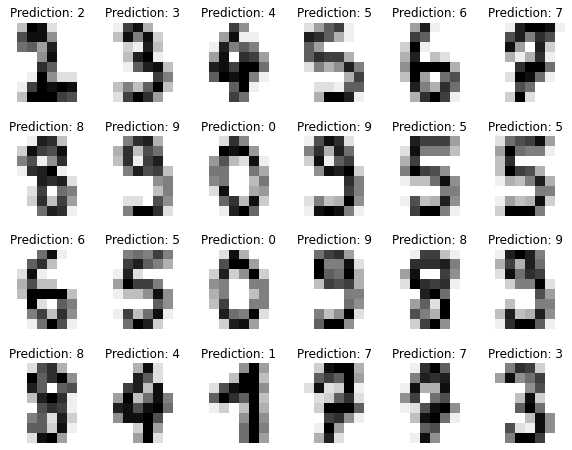

In [ ]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

_, axes = plt.subplots(nrows=4, ncols=6, figsize=(10, 8))
for ax, image, prediction in zip(axes.ravel(), X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.96      0.73      0.83        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.92      0.97      0.95        36
           8       0.78      0.94      0.85        33
           9       0.92      0.89      0.90        37

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted

**Precision** is the total number of correct predictions for a given digit divided by the total number of predictions for that digit. You can confirm the precision by looking at each column in the confusion matrix. 

**Recall** is the total number of correct predictions for a given digit divided by the total number of samples that should have been predicted as that digit. You can confirm the recall by looking at each row in the confusion matrix. 

**F1-score** This is the average of the precision and the recall.

**Support** The number of samples with a given expected value. 


Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  2  0  2  6  0]
 [ 0  0  0  0 34  0  0  0  1  2]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 35  1  0]
 [ 0  1  0  0  0  0  0  0 31  1]
 [ 0  0  0  1  0  1  0  1  1 33]]


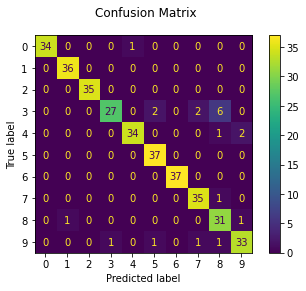

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Running Multiple Models to Find the Best One

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

estimators = {
  'RBF-SVM 1'   : svm.SVC(),
  'RBF-SVM 2'   : svm.SVC(gamma=0.001),
  'Poly-SVM 1'  : svm.SVC(kernel='poly', degree = 3),
  'Poly-SVM 2'  : svm.SVC(kernel='poly', degree = 6),
  'Linear SVM': svm.SVC(kernel='linear'),
  'GaussianNB': GaussianNB(),
  'KNeighborsClassifier': KNeighborsClassifier(),
  'DecisionTree'    : tree.DecisionTreeClassifier()
}

for estimator_name, estimator_object in estimators.items(): 
  kfold = KFold(n_splits=10, random_state=11, shuffle=True) 
  scores = cross_val_score(estimator = estimator_object, X = digits.data, y = digits.target, cv = kfold)
  print(f'{estimator_name:>20} : ' + f'mean accuracy = {scores.mean():.2%}\t ' + f'standard deviation = {scores.std():.2%}')  

           RBF-SVM 1 : mean accuracy = 98.72%	 standard deviation = 0.79%
           RBF-SVM 2 : mean accuracy = 99.17%	 standard deviation = 0.67%
          Poly-SVM 1 : mean accuracy = 99.05%	 standard deviation = 0.66%
          Poly-SVM 2 : mean accuracy = 98.22%	 standard deviation = 1.02%
          Linear SVM : mean accuracy = 98.00%	 standard deviation = 1.12%
          GaussianNB : mean accuracy = 84.48%	 standard deviation = 3.47%
KNeighborsClassifier : mean accuracy = 98.72%	 standard deviation = 0.75%
        DecisionTree : mean accuracy = 85.64%	 standard deviation = 2.21%




---
# LAB - Data set wine
Classify wine dataset into 3 classes using SVM 

In [ ]:
#Jamie Juntorn Thiantanukij 2021610213
#Use SVM to classify/predict 
#Change the gamma/kernel/degree to maximize the accuracy
#Explaination: Either in textboxes or comments

wines = datasets.load_wine()
print(wines.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
#Setting up the Data
X = wines.data
y = wines.target

In [ ]:
#Split data into train and test subsets
#Training data is the part to create a model; for model to learn
#Testing data is use to test model performance
#Here I divide the data randomly; training 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

In [ ]:
# Create a classifier: a support vector classifier
#creates a line or a hyperplane which separates the data into classes.
clfWine = svm.SVC()

# Training / Learning
clfWine.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### **Below is a classification report.**
As you can noticed, the table is divided into 4 coulumns. 
1. Precision - defined as the ratio of true positives to the sum of true and false positives. (In short: Accuracy of positive predictions)

   (tp / tp + fp)


2. Recall - defined as the ratio of true positives to the sum of true positives and false negatives. (In short: Fraction of positives that were correctly identified.)

  (tp / tp + fn)


3. F1-Score - the weighted harmonic mean of precision and recall. (The closer the value of the F1 score is to 1.0, the better the expected performance of the model is whereas 0.0 is the worst.) 

  (recall^-1 + precision^-1 / 2)^-1 or (2*(Recall * Precision) / (Recall + Precision))


4. Support - the number of actual occurrences of the class in the dataset. (it just diagnoses the performance evaluation process.)


  Notes:

  **TN / True Negative: when a case was negative and predicted negative

  **TP / True Positive: when a case was positive and predicted positive

  **FN / False Negative: when a case was positive but predicted negative

  **FP / False Positive: when a case was negative but predicted positive

In [ ]:
# Predict the value of the digit on the test subset
#Classification Report

predicted = clfWine.predict(X_test)
print(f"Classification report for classifier {clfWine}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.44      0.89      0.59        19
           2       1.00      0.05      0.09        21

    accuracy                           0.56        54
   macro avg       0.76      0.60      0.51        54
weighted avg       0.76      0.56      0.46        54




### Confusion Matrix

  First, what is confusion matrix?

  Confusion matrix is a summary of prediction results on a classification problem. Can be use to measures the performance of Machine Learning Classification. 
  
  It represents the different combinations of True VS Predicted labels/values.

  Intepretation of this Matrix (If I understand correctly):
  
  For example, The first row are the actual wine in class 0. The model predicted 12 of these correctly and incorrectly predicted 46 of the class 0 to be class 1 and 0 of the class 0 to be 2.

  Looking at the male column, of the 14 wines predicted by the model (sum of column 0), 12 were actually class 0, while 2 were class 1 incorrectly predicted to be class 0 and 0 were class 2 incorrectly predicted to be class 0.

  In this matrix, the diagonal values (12, 17, 1) is the correct predictions (true). 



Confusion matrix:
[[12  2  0]
 [ 2 17  0]
 [ 0 20  1]]


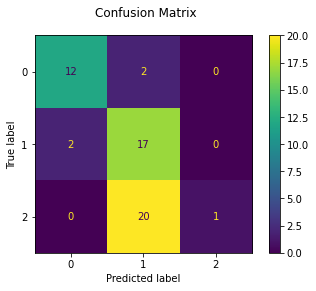

In [ ]:
#Confusion Matrix
disp = metrics.plot_confusion_matrix(clfWine, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
#Running Multiple Models, to find the best one.
#understanding which models work for the given data.
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

estimators = {
  #Default Value of Gamma
  'RBF-SVM 1'   : svm.SVC(),
  #Assign Value to Gamma; Customize
  #compare different values of Gamma
  'RBF-SVM (0.1)'  : svm.SVC(gamma=0.1), #lowest mean accuracy
  'RBF-SVM 3 (0.01)'  : svm.SVC(gamma=0.01),
  'RBF-SVM 4 (0.001)'   : svm.SVC(gamma=0.001),
  'RBF-SVM 5 (0.0001)'  : svm.SVC(gamma=0.0001), 
  'RBF-SVM 6 (0.0003)'  : svm.SVC(gamma=0.0003), #highest mean accuracy

  #Polynomial SVM
  #Degree parameter controls the flexibility of the decision boundary. 
  #Higher degree kernels yield a more flexible decision boundary.

  #Default Value
  'Poly-SVM 1 (3)'  : svm.SVC(kernel='poly', degree = 3), #lowest mean accuracy
  #Assigned Value; trying out different values of degree
  'Poly-SVM 2 (6)'  : svm.SVC(kernel='poly', degree = 6),
  'Poly-SVM 3 (5)'  : svm.SVC(kernel='poly', degree = 5), #highest mean accuracy
  'Poly-SVM 4 (4)'  : svm.SVC(kernel='poly', degree = 4),

  #Linear SVM
  'Linear SVM': svm.SVC(kernel='linear'),

  #Sigmoid
  'Sigmoid SVM 1 (3)': svm.SVC(kernel ='sigmoid', degree = 3),
  #'Sigmoid SVM 2 (6)': svm.SVC(kernel ='sigmoid', degree = 6), nothing change

  'GaussianNB': GaussianNB(),
  'KNeighborsClassifier': KNeighborsClassifier(),
  'DecisionTree'    : tree.DecisionTreeClassifier()
}

#For Loop
for estimator_name, estimator_object in estimators.items(): 
  kfold = KFold(n_splits=10, random_state=11, shuffle=True) 
  scores = cross_val_score(estimator = estimator_object, X = wines.data, y = wines.target, cv = kfold)
  print(f'{estimator_name:>20} : ' + f'mean accuracy = {scores.mean():.2%}\t ' + f'standard deviation = {scores.std():.2%}')  

           RBF-SVM 1 : mean accuracy = 67.94%	 standard deviation = 13.26%
       RBF-SVM (0.1) : mean accuracy = 43.40%	 standard deviation = 10.42%
    RBF-SVM 3 (0.01) : mean accuracy = 69.67%	 standard deviation = 13.50%
   RBF-SVM 4 (0.001) : mean accuracy = 66.80%	 standard deviation = 12.37%
  RBF-SVM 5 (0.0001) : mean accuracy = 71.24%	 standard deviation = 13.00%
  RBF-SVM 6 (0.0003) : mean accuracy = 72.32%	 standard deviation = 13.33%
      Poly-SVM 1 (3) : mean accuracy = 65.65%	 standard deviation = 11.77%
      Poly-SVM 2 (6) : mean accuracy = 66.24%	 standard deviation = 12.49%
      Poly-SVM 3 (5) : mean accuracy = 67.91%	 standard deviation = 11.79%
      Poly-SVM 4 (4) : mean accuracy = 67.39%	 standard deviation = 12.05%
          Linear SVM : mean accuracy = 95.52%	 standard deviation = 4.17%
   Sigmoid SVM 1 (3) : mean accuracy = 15.75%	 standard deviation = 8.25%
          GaussianNB : mean accuracy = 97.75%	 standard deviation = 2.76%
KNeighborsClassifier : mean 